# IN4080 – Natural Language Processing

This assignment has two parts:
* Part A: Texts and frequencies
* Part B: Text classification

We start with importing the libraries we will be using through the assignment.

In [1]:
import nltk
from nltk.book import *
from nltk.corpus import brown

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Part A: Texts and frequencies

### Exercise 1 – Conditional frequency distributions


Brown Corpus is an electronic collection of text samples of American English, the first major structured corpus of varied genres. We will conduct a experiment with this corpus. We are in particular interested in to which degree the different genres use the masculine pronouns (he, him) or the feminine pronouns (she, her). 

**a)** 
Conducting a experiment with the genres: news, religion,
government, fiction, romance as conditions, and occurrences of the words: he, she, her, him,
as events. 

In [2]:
genres = ['news', 'religion','government', 'fiction', 'romance']
pronouns = ['he', 'she', 'her', 'him']

cfd = nltk.ConditionalFreqDist((genre, word)
                            for genre in genres
                            for word in brown.words(categories=genre))
cfd.tabulate(samples=pronouns)

            he she her him 
   fiction 813 280 397 375 
government 120   0   3  25 
      news 451  42 103  93 
  religion 137  10   8  60 
   romance 702 496 651 339 


**b)** It is easy to see that the word 'he' is most used word in all genres. One explanation for this could be that most of the main characters in all genres are man, specially in goverment, news and religion. The feminine objective pronoun is used more than the 'him' in the genre of romance, but used a lot less in the genre of goverment and religion. This is logical, since most of romance genres are about a women while the complete opposite in the case religion and goverment.

**c)** 

Maybe not so surprisingly, the masculine forms are more frequent than the feminine forms across all
genres. However, we also observe another pattern. The relative frequency of her compared to she
seems higher than the relative frequency of him compared to he. We want to explore this further
and make a hypothesis, which we can test.

**Hypothesis**: The relative frequency of the objective form, her, of the feminine personal pronoun (she or
her) is higher than the relative frequency of the objective form, him, of the masculine personal
pronoun, (he or him).

We will construct a conditional frequency distribution to test this hypothesis, which uses gender as condition, and for each gender counts the occurrences of nominative forms (he, she) and objective forms (him, her).

In [3]:
genders = ['Male','Female']

cfd = nltk.ConditionalFreqDist()
for word in brown.words():
    word = word.lower()
    if word == 'he' or word == 'him':
        cfd[genders[0]][word] += 1
    if word == 'she' or word == 'her':
        cfd[genders[1]][word] += 1

In [4]:
cfd.tabulate(samples = pronouns)

         he  she  her  him 
Female    0 2860 3036    0 
  Male 9548    0    0 2619 


In [5]:
def find_sum(gender):
    sum_freq = 0
    for pro in cfd[gender]:
        sum_freq += cfd[gender][pro]
    return sum_freq

male_rel_freq = cfd['Male']['him']/(find_sum('Male'))
female_rel_freq = cfd['Female']['her']/(find_sum('Female'))

print(f'Relative frequency of him: {male_rel_freq:3.4f}')
print(f'Relative frequency of her: {female_rel_freq:3.4f}')

Relative frequency of him: 0.2153
Relative frequency of her: 0.5149


We can see here that the objective form of the feminine pronoun is relatively
more frequent than the objective form of the male pronoun. 

**d)** It is tempting to conclude from this that the objective form of the feminine pronoun is relatively
more frequent than the objective form of the male pronoun. Beware, however, her is not only the
feminine equivalent of him, but also of his. 

We use a tagged corpus, which separates between the two forms of her,
i.e, if the corpus tags her as a personal pronoun differently from her as a possessive pronoun
(determiner). The tagged Brown corpus does that. We will use this to count the occurrences of she,
he, her, him as personal pronouns and her, his, hers as possessive pronouns.

In [6]:
#chose to have universal pos tags
tag_brown = [x for x in brown.tagged_words(tagset='universal')]

pers_pronoun = ['she','he','her','him']
poss_pronoun = ['her','his','hers']

total_pronoun = set(pers_pronoun + poss_pronoun )

In [7]:
cfd_new = nltk.ConditionalFreqDist()

def make_cfd(list_of_pronoun, type_of_pronoun):
    for i in range(len(tag_brown)):
        word = tag_brown[i][0].lower()
        if word in list_of_pronoun and tag_brown[i][1] == type_of_pronoun:
            cfd_new[tag_brown[i][1]][word] += 1
make_cfd(pers_pronoun,'PRON')
make_cfd(poss_pronoun,'DET')

In [8]:
cfd_new.tabulate(samples = total_pronoun)

      his  she   he hers  him  her 
 DET 6957    0    0    0    0 1929 
PRON    0 2860 9546    0 2619 1107 


**e)**
We can now correct the numbers from point (b) above. 

In [9]:
def find_sum(pro_type, list_of_pro):
    sum_freq = 0
    for word in list_of_pro:
        sum_freq += cfd_new[pro_type][word]
    return sum_freq

det_her = cfd_new['DET']['her']/find_sum('DET', poss_pronoun)
pron_her = cfd_new['PRON']['her']/find_sum('PRON', pers_pronoun)
non_she = cfd_new['PRON']['she']/find_sum('PRON', pers_pronoun)


det_him = cfd_new['DET']['his']/find_sum('DET', poss_pronoun)
non_he = cfd_new['PRON']['he']/find_sum('PRON', pers_pronoun)

print(f'Relative frequency of him as possessive pronoun: {det_him:3.4f}')
print(f'Relative frequency of her as possessive pronoun: {det_her:3.4f}')
print(f'Relative frequency of her as objective pronoun: {pron_her:3.4f}')

Relative frequency of him as possessive pronoun: 0.7829
Relative frequency of her as possessive pronoun: 0.2171
Relative frequency of her as objective pronoun: 0.0686


**f)** Illustrating the numbers from (d) with a bar chart.

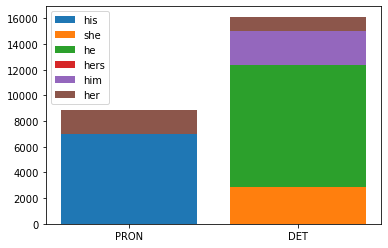

In [12]:
import numpy as np
import matplotlib.pyplot as plt

xticks = cfd_new.keys()
x = np.arange(0, len(cfd_new.keys()))
height = np.zeros(len(cfd_new.keys()))

for i, p in enumerate(total_pronoun):
    y = []    
    for j, genre in enumerate(['DET','PRON']):
        y.append(cfd_new[genre][p])
    plt.bar(x, y, label=p, bottom=height)
    height += y

plt.xticks(np.arange(0, len(xticks)), xticks)
plt.legend()
plt.show()

**g)** We can see that the masculine pronoun is more frequent than the feminine pronoun in the Brown corpus. This corpus was compiled from works published in the United States in 1961. In that periode, the American society was mainly male dominated. Specially in the fields of goverment, relgion and cultural activities. This can be seen from our analysis as well. For example, the word 'she' and 'her' was only mentioned 3 times in the genre of goverment (task a). From task f, we found that the 'her' has two different distribution for possessive and objective pronouns while the masculine pronoun has no objective pronoun. This, again, could be a result of the male dominated society where the female gender were looked at from a objective point of view. 

This exercise demonstrate the consequences for the development of language technology. A word can have different meanings in different contexts, and this makes it difficult to make a general analysis. We must differentiate the different meanings of the words in the text.

## Exercise 2 – Downloading texts and Zipf’s law

We start by downloading the text we want to analyze. 

In [14]:
from urllib import request
url = "https://www.gutenberg.org/files/74/74-0.txt"
response = request.urlopen(url)
raw_data = response.read().decode('utf-8')

**b)** We want to remove the unnecarrary data by removing the extra headlines, the list of contents and the extra text at the end of the book.  

In [15]:
#splitting the raw_data into a list.
raw_data_list = raw_data.split()

#finding the deleting indecies, ego. "***"
delete_start = [i for i in range(len(raw_data_list)) if raw_data_list[i] == '1876.']
delete_end = [i for i in range(len(raw_data_list)) if raw_data_list[i] == '***'] 

#slicing out the extra headlines. 
raw_data_list = raw_data_list[delete_start[0]+1:delete_end[2]]

**c)** We can now extract the words. We are interested in the words used in the book and their
distribution. We are, e.g. not interested in punctuation marks. In this code, I have removed stored the words, numbers, punc_marks and other tokens in their separate lists.

In [16]:
# tokenizing the data
token_data = nltk.word_tokenize(' '.join([str(w) for w in raw_data_list]))
words = []
numbers = []
punc_marks = []
other_tokens = []

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—'
for word in token_data:
    word = word.lower()
    if word.isalpha():
        words.append(word)
    elif word.isdigit():
        numbers.append(word)
    elif word in punctuation: 
        punc_marks.append(word)
    else:
        other_tokens.append(word)

Printing the different lists just to see how the elements look like.

In [21]:
def print_lists(s, the_list):
    print(s)
    for l in the_list[0:50]:
        print(l,end=' ')
    print(" ")
print_lists('### WORDS: ###', words)
print_lists('### NUMBERS: ###', numbers)
print_lists('### PUNC_MARKS: ###',punc_marks)
print_lists('### OTHER_TOKENS: ###', other_tokens)

### WORDS: ###
chapter i tom no answer tom no answer what s gone with that boy i wonder you tom no answer the old lady pulled her spectacles down and looked over them about the room then she put them up and looked out under them she seldom or never looked them  
### NUMBERS: ###
2 2 2 2 2 2 2 2 2  
### PUNC_MARKS: ###
! . ! . , ? ! . ; . ; , , , . , , , : , , , . . ! . . : ! . ! . ? ! . . ? , , . . . ! , ! , . , , .  
### OTHER_TOKENS: ###
“ ” “ ” “ ’ ” _through_ “ ” service—she stove-lids “ ’ ll— ” “ ” “ ” “ y-o-u-u ” “ ’ ’ ” “ nothing. ” “ _is_ ” “ ’ aunt. ” “ ’ jam—that ’ ’ ’ ’ switch. ” air—the desperate— “ ”  


We can see that the list for "other_tokens" contains a lot of words, but since they have some kind som puntuation mark in it they have been putted on *other_tokens*. We have to clean these words and insert them in the correct list.

In [22]:
for _ in range(1000):
    for o in other_tokens:
        #if the token contains words with punc_mark
        if any(x.isalpha() for x in o) and any(x in punctuation for x in o):
            other_tokens.pop(other_tokens.index(o))
            for char in o:
                if char in punctuation:
                    o = o.split(char)
                    break
            o = [w for w in o if w != '']
            for w in o:    
                words.append(w)

**d)** Using the the nltk.FreqDist() to count the words. The 20 most frequent words in a table
with their absolute frequencies:

In [24]:
freq_dist = nltk.FreqDist(words)

import itertools
import operator

sorted_freq_dist = dict(sorted(freq_dist.items(), key=operator.itemgetter(1),reverse=True))
sorted_freq_dist = dict(itertools.islice(sorted_freq_dist.items(), 20))

print("The 20 most frequent words:")
for key in sorted_freq_dist:
    print(f'{key}: {freq_dist[key]}')

The 20 most frequent words:
the: 3702
and: 3104
a: 1861
to: 1715
of: 1435
it: 1315
he: 1252
was: 1168
that: 1025
i: 1015
in: 941
you: 893
s: 845
his: 815
tom: 773
t: 678
with: 647
they: 616
but: 579
for: 525


**e)** The frequencies of frequencies.

In [25]:
freq = nltk.FreqDist()
selection = ['1 time','2-10 times', '11-50 times','51-100 times','100+ times']

for k in freq_dist:
    if freq_dist[k] == 1 :
        freq[selection[0]] += 1
    elif freq_dist[k] >= 2 and freq_dist[k] <= 10:
        freq[selection[1]] += 1
    elif freq_dist[k] >= 11 and freq_dist[k] <=50:
        freq[selection[2]] += 1
    elif freq_dist[k] >= 51 and freq_dist[k] <=100:
        freq[selection[3]] += 1
    else:
        freq[selection[4]] += 1

In [26]:
import pandas as pd

col_keys = []
col_values = []
for k in freq:
    col_keys.append(k)
    col_values.append(freq[k])
    
pd.DataFrame.from_dict(data = {'Words occurring:':col_keys,'Frequencies of frequencies:': col_values})

,Words occurring:,Frequencies of frequencies:
0,1 time,3549
1,2-10 times,2988
2,11-50 times,496
3,100+ times,110
4,51-100 times,85


We can see that there are alot of words that only occur one time and there are words that occur only 85 occurrences of the words that have been occured 51-100 times. Below, a plot of this table is shown.

Text(0, 0.5, 'Frequencies of frequencies')

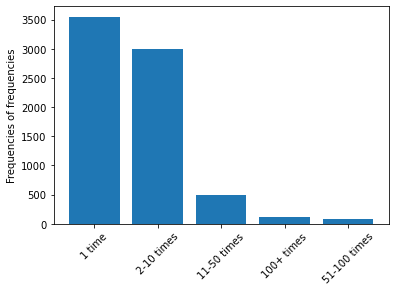

In [27]:
plt.bar(col_keys,col_values)
plt.xticks(rotation=45)
plt.ylabel("Frequencies of frequencies")

**f)** We order the words by their frequencies, the most frequent word first. We will use the same result as the task **d** for finding the 20 most frequent words.

In [28]:
#the 20 most frequent words
sorted_freq_dist = dict(itertools.islice(sorted_freq_dist.items(), 20))
ranks = range(1,21)
zipf_constant = [i*sorted_freq_dist[k] for i,k in zip(ranks,sorted_freq_dist)]
occurrences = [sorted_freq_dist[k] for k in sorted_freq_dist]

In [29]:
pd.DataFrame.from_dict(data = {'Ranks:':ranks,'Occurrences': occurrences, 'Zipf law:': zipf_constant})

,Ranks:,Occurrences,Zipf law:
0,1,3702,3702
1,2,3104,6208
2,3,1861,5583
3,4,1715,6860
4,5,1435,7175
5,6,1315,7890
6,7,1252,8764
7,8,1168,9344
8,9,1025,9225
9,10,1015,10150


**g)** Now we can plot the rank against frequency for all words. First, make a plot where you use linear scale on the axes. Then try to make a plot similarly to the [Wikipedia figure](https://en.wikipedia.org/wiki/Zipf%27s_law) with logarithmic scales at both axes.

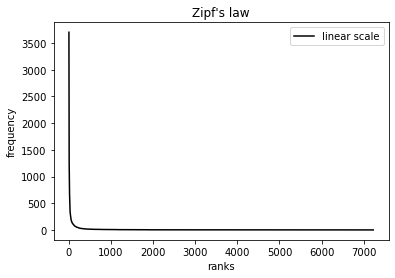

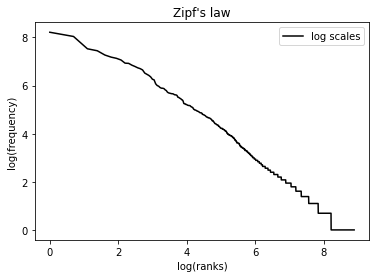

In [30]:
sorted_freq_dist = dict(sorted(freq_dist.items(), key=operator.itemgetter(1),reverse=True))
occurences = np.array([sorted_freq_dist[k] for k in sorted_freq_dist])
ranks = np.linspace(1,len(occurences), len(occurences))

plt.plot(ranks, occurences,'k',label='linear scale')
plt.xlabel('ranks')
plt.ylabel('frequency')
plt.title("Zipf's law")
plt.legend()
plt.figure()

plt.plot(np.log(ranks),np.log(occurences),'k',label='log scales')
plt.xlabel('log(ranks)')
plt.ylabel('log(frequency)')
plt.title("Zipf's law")
plt.legend()
plt.show()

We can see here that the plot is quite good approximation to the Zipf's law.

## Part B: Text classification

## 1) First classifier and vectorization

### 1a) Inititial classifier

We will work interactively in python/ipython/Jupyter notebook. Start by importing the tools we
will be using:

In [31]:
import nltk
import random
import numpy as np
import scipy as sp
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In this task we will use Movie Reviews Corpus from the NLTK package.

In [32]:
from nltk.corpus import movie_reviews

In [33]:
raw_movie_docs = [(movie_reviews.raw(fileid), category) for
category in movie_reviews.categories() for fileid in
movie_reviews.fileids(category)]

We will shuffle the data and split it into 200 documents for final testing (which we will not use for
a while) and 1800 documents for development. Use your birth date as random seed.

In [34]:
random.seed(2920)
random.shuffle(raw_movie_docs)
movie_test = raw_movie_docs[:200]
movie_dev = raw_movie_docs[200:]

Then split the development data into 1600 documents for training and 200 for development test
set.

In [35]:
train_data = movie_dev[:1600]
dev_test_data = movie_dev[1600:]

Splitting the train_data into two lists, each of 1600 elements, the first, train_texts, containing the texts (as strings) for each document, and the train_target, containing the corresponding 1600 labels. Doing the same for dev_test_data.

In [36]:
def split_text_and_target(trian_list):
    texts = []
    targets = []
    for text,label in trian_list:
        texts.append(text)
        targets.append(label)

    return texts,targets

In [37]:
train_texts, train_target = split_text_and_target(train_data)
dev_test_texts, dev_test_target = split_text_and_target(dev_test_data)

It is then time to extract features from the text. We import

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

We then make a CountVectorizer v. This first considers the whole set of training data, to determine
which features to extract:

In [39]:
v = CountVectorizer()
v.fit(train_texts)

CountVectorizer()

Then we use this vectorizer to extract features from the training data and the test data

In [40]:
train_vectors = v.transform(train_texts)
dev_test_vectors = v.transform(dev_test_texts)

We are now ready to train a classifier. For this task, we chose to use a multinomial naive Bayes text classifier.

In [41]:
clf = MultinomialNB()
clf.fit(train_vectors, train_target)

MultinomialNB()

We can proceed and see how the classifier will classify one test document, e.g.

In [42]:
dev_test_texts[14]
clf.predict(dev_test_vectors[14])

array(['neg'], dtype='<U3')

We can use the procedure to predict the results for all the test_data, by

In [43]:
clf.predict(dev_test_vectors)

array(['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos',
       'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg',
       'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'neg',

We can use this for further evaluation (accuracy, recall, precision, etc.) by comparing to
dev_test_targets. Alternatively, we can get the accuracy directly by

In [44]:
clf.score(dev_test_vectors, dev_test_target)

0.855

This results in 0.855 accuracy score for a multinomial naive Bayes text classifier.

### 1b) Parameters of the vectorizer

We have so far considered the standard parameters for the procedures from scikit-learn. These procedures have, however, many parameters. To get optimal results, we should adjust the parameters.
We can use train_data for training various models and dev_test_data for testing and comparing
them.

CountVectorizer case-folds by default. For a different corpus, it could be interesting
to check the effect of this feature, but even the movie_reviews.raw() is already in lower case, so that
does not have an effect here. We could also have explored the effect of exchanging
the default tokenizer included in CountVectorizer with other tokenizers.

Another interesting feature is *binary*. Setting this to True implies only counting whether a word
occurs in a document and not how many times it occurs. It could be interesting to see the effect
of this feature.

The feature *ngram_range* = [1,1] means we use tokens (=unigrams) only, [2,2] means using bigrams
only, while [1,2] means both unigrams and bigrams, and so on.

Now, we do some experiments where we let binary vary over [False, True] and ngram_range vary over [[1,1],
[1,2], [1,3]] and try see which setting gives the most optimal accuracy.

In [45]:
def varying_paramters(ngram_range, binary):
    v = CountVectorizer(ngram_range = ngram_range, binary = binary)
    v.fit(train_texts)

    train_vectors = v.transform(train_texts)
    dev_test_vectors = v.transform(dev_test_texts)

    clf = MultinomialNB()
    clf.fit(train_vectors, train_target)
    clf.predict(dev_test_vectors)
    return clf.score(dev_test_vectors, dev_test_target)

n_gram_list = [(1,1),(1,2),(1,3)]
binary_list = [False,True]

accuracy = {binary_list[0]: [], binary_list[1]:[]}

for binary in binary_list:
    for ngram_range in n_gram_list:
        accuracy[binary].append(varying_paramters(ngram_range, binary))

In [46]:
col1 = [accuracy[binary_list[0]][0], accuracy[binary_list[1]][0]]
col2 = [accuracy[binary_list[0]][1], accuracy[binary_list[1]][1]]
col3 = [accuracy[binary_list[0]][2], accuracy[binary_list[1]][2]]

table = {n_gram_list[0]: col1, n_gram_list[1]:col2,n_gram_list[2]:col3}

df = pd.DataFrame(data = table, columns = n_gram_list)
df.index = binary_list
df

,"(1, 1)","(1, 2)","(1, 3)"
False,0.855,0.865,0.835
True,0.845,0.885,0.860


It looks like for *ngram_range* paramter for (1,1), the *binary* variable for False gives the best accuracy. But for the other values of *ngram_range*, *binary = True* gives better prediction. The conclusion of this experiment is that we get best results by using unigrams and bigrams tokens (*ngram_range*=(1, 2)), and counting whether a word occurs in a document and not how many times it occurs (*binary=True*).

## 2) n-fold cross-validation

**2a)** 

Our *dev_test_data* contains only 200 items. That is a small number for a test set for a binary
classifier. The numbers we report may depend to a large degree on the split between training
and test data. To get more reliable numbers, we may use n-gram cross-validation. We can use
the whole *dev_test_data* of 1800 items for this. To get round numbers, we decide to use 9-fold
cross-validation, which will put 200 items in each test set.

In this case, we will use the best settings from exercise 1 and run a 9-fold cross-validation. The best settings of exercise 1 was:

In [47]:
best_binary = True
best_ngram_range = (1,2)

We decide to use 9-fold cross-validation which will put 200 items in each test set. This means that by this method, we will end up using the whole dataset for testing. Therefore, I divided the *movie_dev* into exactly 9 folds. The first fold has the indices of movie_dev[0-200], the second has movie_dev[200-400] and so on, and the rest of the *movie_dev* data for each iteration is used for training.

In [48]:
def find_accuracy(clf,binary,ngram_range,printing= True):
    accuracies = []
    
    #n_gram fold cross validation
    for i in range(1,10):
        end_slice = i*2*100
        start_slice = end_slice - 200

        dev_test_data = movie_dev[start_slice:end_slice]
        if start_slice == 0:
            train_data = movie_dev[end_slice:]
        elif start_slice == 1600:
            train_data = movie_dev[:start_slice]
        else:
            train_data = movie_dev[:start_slice] + movie_dev[end_slice:]

        ##splitting the data into texts and target:
        train_texts, train_target = split_text_and_target(train_data)
        dev_test_texts, dev_test_target = split_text_and_target(dev_test_data)

        ##vectorizing the data:
        v_best = CountVectorizer(ngram_range = ngram_range, binary = binary)
        v_best.fit(train_texts)

        train_vectors = v_best.transform(train_texts)
        dev_test_vectors = v_besttrain_texts, train_target = split_text_and_target(train_data)
        dev_test_texts, dev_test_target = split_text_and_target(dev_test_data).transform(dev_test_texts)

        clf.fit(train_vectors, train_target)
        clf.predict(dev_test_vectors)
        accuracy = clf.score(dev_test_vectors, dev_test_target)
        accuracies.append(accuracy)

        if printing == True:
            print(f'n = {i} | Acuuracy: {accuracy:3.4f} - index: {start_slice} - {end_slice}')

    mean_of_accuracy = np.mean(accuracies)
    std_of_accuracy = np.std(accuracies)
    if printing == True:
        print(f'Mean of accuracy: {mean_of_accuracy:3.4f} | Standard deviation: {std_of_accuracy:3.4f}')
    return mean_of_accuracy

accuracy = find_accuracy(MultinomialNB(),best_binary,best_ngram_range)

n = 1 | Acuuracy: 0.8150 - index: 0 - 200
n = 2 | Acuuracy: 0.8600 - index: 200 - 400
n = 3 | Acuuracy: 0.8900 - index: 400 - 600
n = 4 | Acuuracy: 0.8250 - index: 600 - 800
n = 5 | Acuuracy: 0.8250 - index: 800 - 1000
n = 6 | Acuuracy: 0.8550 - index: 1000 - 1200
n = 7 | Acuuracy: 0.8900 - index: 1200 - 1400
n = 8 | Acuuracy: 0.8350 - index: 1400 - 1600
n = 9 | Acuuracy: 0.8850 - index: 1600 - 1800
Mean of accuracy: 0.8533 | Standard deviation: 0.0282


**2b)**

The large variation we see between the results, raises a question regarding whether the optimal
settings we found in exercise 1, would also be optimal for another split between training and test.
To find out, we combine the 9-fold cross-validation with the various settings for CountVectorizer. For each of the 6 settings, we will run 9-fold cross-validation and calculate the mean accuracy.

In [49]:
accuracy_CV = {binary_list[0]: [], binary_list[1]:[]}

for binary in binary_list:
    for ngram_range in n_gram_list:
        accuracy_CV[binary].append(find_accuracy(MultinomialNB(),binary,ngram_range,printing= False))

col1 = [accuracy_CV[binary_list[0]][0], accuracy_CV[binary_list[1]][0]]
col2 = [accuracy_CV[binary_list[0]][1], accuracy_CV[binary_list[1]][1]]
col3 = [accuracy_CV[binary_list[0]][2], accuracy_CV[binary_list[1]][2]]

table = {n_gram_list[0]: col1, n_gram_list[1]:col2,n_gram_list[2]:col3}

df = pd.DataFrame(data = table, columns = n_gram_list)
df.index = binary_list
df

,"(1, 1)","(1, 2)","(1, 3)"
False,0.817222,0.833889,0.818889
True,0.821667,0.853333,0.850556


It looks like that we get the same results as above. The best paramters for vectorization is **(1,2)** for *ngram_range* and **True** for  *binary*

## 3) Logistic Regression

We know that Logistic Regression may produce better results than Naive Bayes. We will see what
happens if we use Logistic Regression instead of Naive Bayes. We start with the same multinomial
model for text classification but exchange the learner with sciki-learn’s LogisticRegression. Since logistic regression is slow to train, we restrict ourselves somewhat with respect to which
experiments to run. We consider two settings for the CountVectorizer, the default setting and the
setting which gave the best result with naive Bayes when we ran cross-validation (though, this
does not have to be the best setting for the logistic regression).

In [50]:
LogReg = LogisticRegression(solver='liblinear')

#running the find_accuracy(-) function to find the mean accuracy for logistic classifier
acc_log_default = find_accuracy(LogReg,False,(1, 1),printing= False) #default valeus 
acc_log_setting = find_accuracy(LogReg,True,(1,2),printing= False) #best setting values

In [51]:
table = {"Logistic regression: ": [acc_log_default,acc_log_setting], 
         "Naive Bayes": [accuracy_CV[False][0],accuracy_CV[True][1] ]}
df = pd.DataFrame(data = table)
df.index = ["Default values: ", "Best setting values: "]
df

,Logistic regression:,Naive Bayes
Default values:,0.832778,0.817222
Best setting values:,0.871667,0.853333


We can see here that that Logistic regression is much better classfier than Naive Bayes (NB). We used same vectorization parameters for Logistic regression and Naive Bayes, but in both cases ended up with Logistic regression having a better accuracy. Both algorithms are probability-based, but NB is a generative classifier. It has a specific model of how the data are generated, meaning that it only considers the occurences of the words. While on the otherside, LogReg is a discriminative classifier. It only considers the conditional probability. 